In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv('./insurance.csv')

### Data Exploration

In [2]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
dataset.shape

(1338, 7)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [6]:
len(dataset.select_dtypes(include='object').columns)

3

In [7]:
dataset.select_dtypes(include=['int64', 'float64']).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [8]:
len(dataset.select_dtypes(include=['int64', 'float64']).columns)

4

### Statistical Summary

In [9]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Group the dataset by 'sex', 'smoker', and 'region'

In [10]:
dataset.groupby('sex').mean(numeric_only=True)

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [11]:
dataset.groupby('smoker').mean(numeric_only=True)

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [12]:
dataset.groupby('region').mean(numeric_only=True)

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


Dealing with missing values

In [13]:
dataset.isnull().values.any()

np.False_

In [14]:
dataset.isnull().values.sum()

np.int64(0)

### Encoding the categorical data

In [15]:
dataset.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [16]:
dataset['sex'].unique()

array(['female', 'male'], dtype=object)

In [17]:
dataset['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [18]:
dataset['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [19]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [20]:
# one hot encoding
dataset = pd.get_dummies(data=dataset, drop_first=True, dtype='int64')
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [21]:
dataset.shape

(1338, 9)

### Correlation matrix

In [22]:
dataset_2 = dataset.drop(columns='charges')

<Axes: title={'center': 'Corrrelation with charges'}>

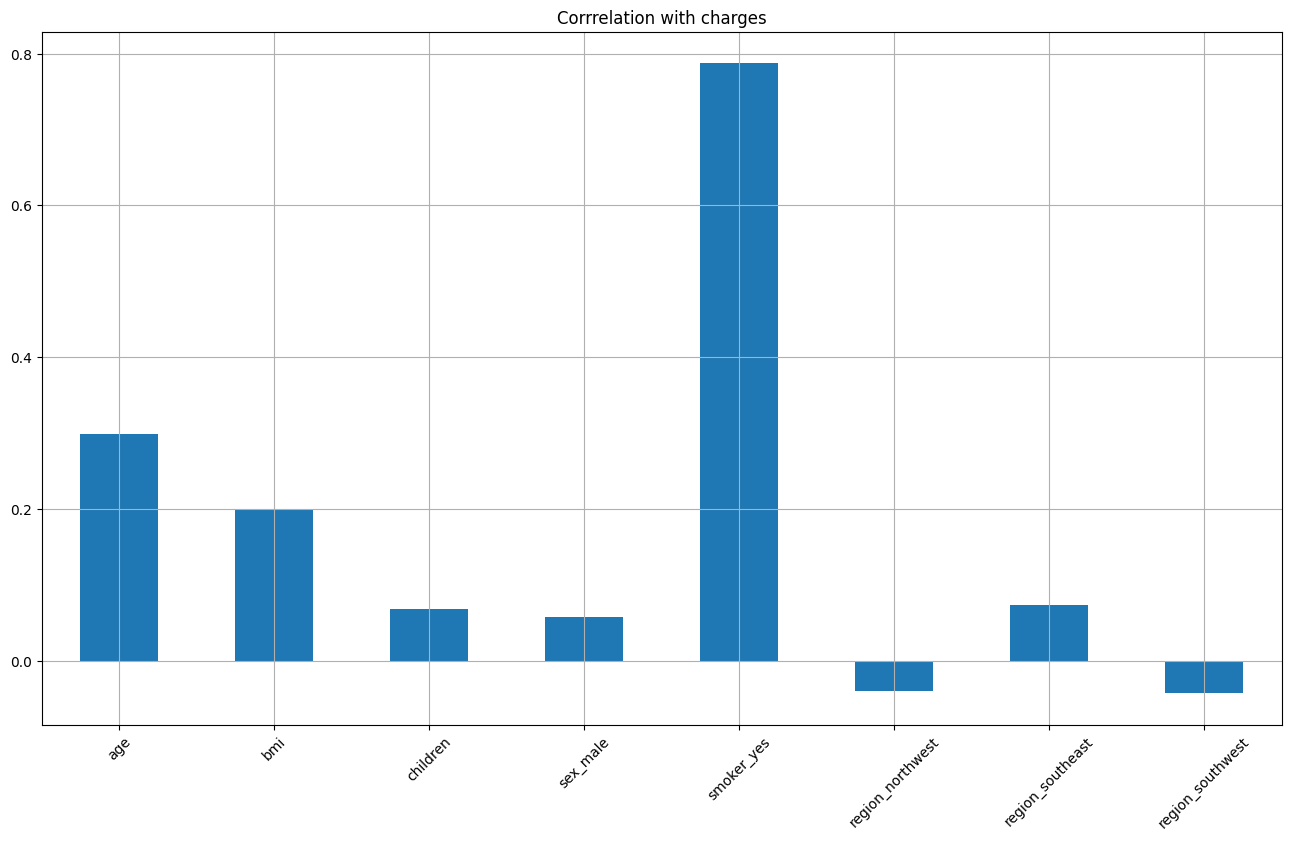

In [23]:
dataset_2.corrwith(dataset['charges']).plot.bar(
    figsize=(16,9), title='Corrrelation with charges', rot=45, grid=True
)

In [24]:
corr = dataset.corr()

<Axes: >

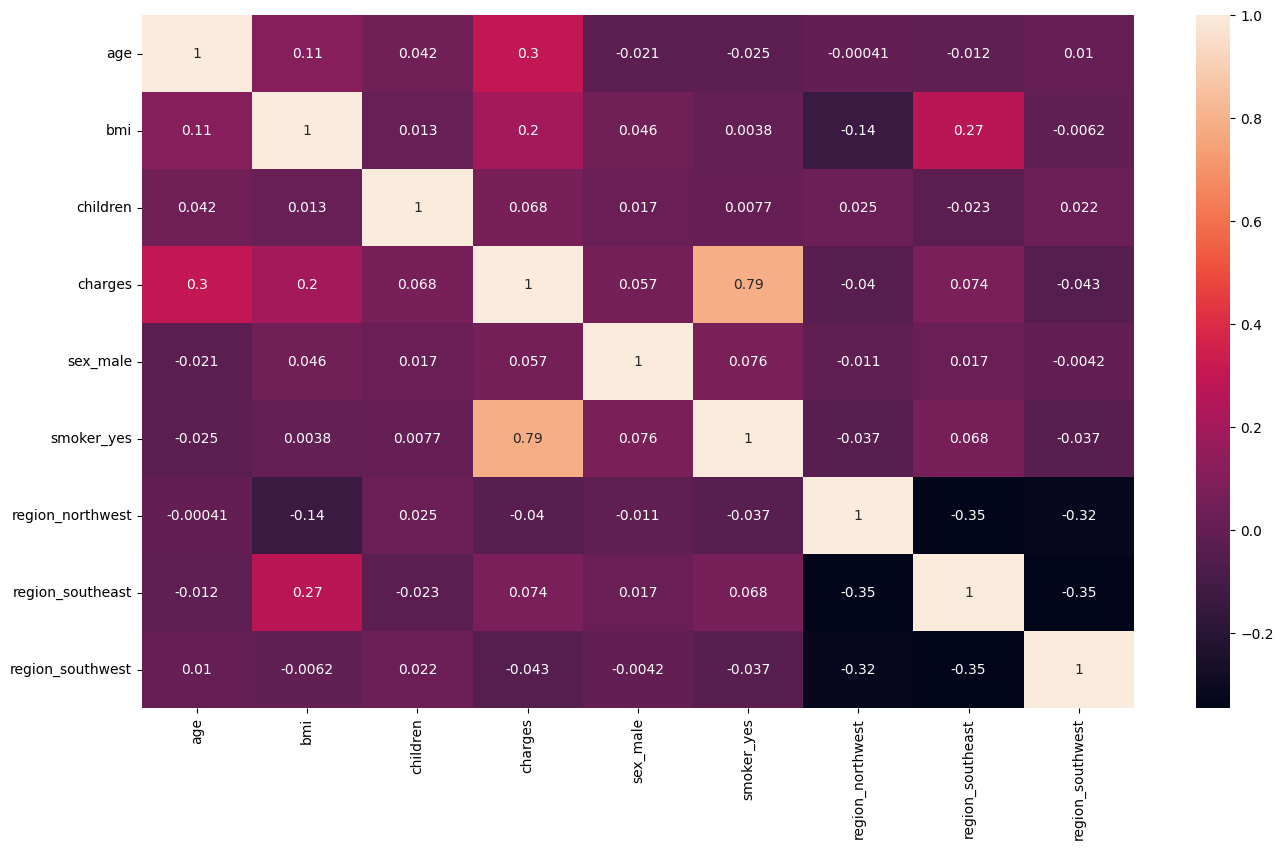

In [25]:
# heatmap
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

### Splitting the dataset

In [26]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [27]:
# matrix of features / independent variables
x = dataset.drop(columns='charges')

In [28]:
# target / dependent variables
y = dataset['charges']

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)

In [30]:
x_train.shape

(1070, 8)

In [31]:
y_train.shape

(1070,)

In [32]:
x_test.shape

(268, 8)

In [33]:
y_test.shape

(268,)

### Feature scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [35]:
x_train

array([[-0.14853305,  0.54530479,  2.41394802, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [-1.49780784,  0.59867181, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.14273553,  0.96092064,  0.76087642, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       ...,
       [ 0.06451033, -0.91339361, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.42679338,  0.77656186, -0.89219519, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       [-0.4325909 , -1.97749955, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925]], shape=(1070, 8))

In [36]:
x_test

array([[ 0.91668389, -0.08539629, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [ 0.56161157, -0.21962242, -0.06565939, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.63262604,  1.59081313,  0.76087642, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       ...,
       [ 1.2717562 ,  1.54472343, -0.89219519, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       [-0.64563429,  1.34581001,  1.58741222, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [ 0.49059711, -0.95948331,  1.58741222, ..., -0.55791981,
        -0.6155209 , -0.58526447]], shape=(268, 8))

## Part 2: Building the model

### 1) Multiple linear regression

In [37]:
from sklearn.linear_model import LinearRegression
regressor_lr = LinearRegression()
regressor_lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
y_pred = regressor_lr.predict(x_test)

In [39]:
from sklearn.metrics import r2_score

In [40]:
r2_score(y_test, y_pred)

0.7999876970680433

### 2) Random forest regression

In [41]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
regressor_rf.fit(x_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [42]:
y_pred = regressor_rf.predict(x_test)

In [43]:
r2_score(y_test, y_pred)

0.8772884638510737

### 3) XGBoost regression

In [44]:
from xgboost import XGBRFRegressor
regressor_xgb = XGBRFRegressor()
regressor_xgb.fit(x_train, y_train)

,learning_rate,1.0
,subsample,0.8
,colsample_bynode,0.8
,reg_lambda,1e-05
,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bytree,None
,device,None


In [45]:
y_pred = regressor_xgb.predict(x_test)

In [46]:
r2_score(y_test, y_pred)

0.8994492709535864

## Part 3: Predict charges for a new customer

### example 1
Name: Frank, age: 40, sex: 1, bmi: 45.50, children: 4, smoker: 1, region: northeast

In [47]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [48]:
frank_obs = [[40, 45.5, 4, 1, 1, 0, 0, 0]]

In [49]:
regressor_xgb.predict(sc.transform(frank_obs))

/media/navneet-prakash/Storage 2/Courses/Machine Learning/Machine Learning & Deep Learning Projects for Beginners 2023/4 - Project 3 Medical insurance premium prediction/insurance/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([43421.676], dtype=float32)

### example 2
Name: Sara, age: 19, bmi: 27.9, children: 0, sex: female, smoker: 0, region: northwest

In [50]:
sara_obs = [[19, 27.9, 0, 0, 0, 1, 0, 0]]
sara_obs

[[19, 27.9, 0, 0, 0, 1, 0, 0]]

In [51]:
regressor_xgb.predict(sc.transform(sara_obs))

/media/navneet-prakash/Storage 2/Courses/Machine Learning/Machine Learning & Deep Learning Projects for Beginners 2023/4 - Project 3 Medical insurance premium prediction/insurance/venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([2374.3804], dtype=float32)